## 6-2. K-평균 
#### 학습목표 
- K-평균 알고리즘의 작동 방식을 이해하고 과일 사진을 자동으로 모으는 비지도 학습 모델을 만들어 보자.

#### 시작하기 전
- 앞에서 사과, 파인애플, 바나나에 있는 각 픽셀의 평균값을 구해서 가장 가까운 사진을 골랐다. 이 경우에는 사과, 파인애플, 바나나 사진임을 미리 알고 있었기 때문에 각 과일의 평균을 구할 수 있었다. 하지만 진짜 비지도 학습에는 사진에 어떤 과일이 들어 있는지 알지 못한다. 

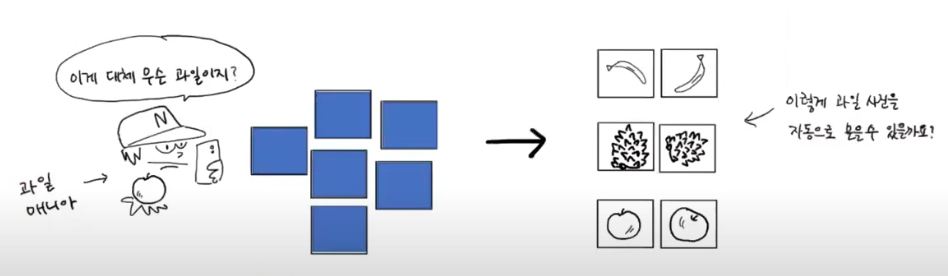

- 이런 경우 어떻게 평균값을 구할 수 있을까? 바로 **K-평균(K-means)** 군집 알고리즘이 평균값을 자동으로 찾아준다. 이 평균값이 클러스터의 중심에 위치하기 때문에 **클러스터 중심(cluster center)** 또는 **센트로이드(centroid)**라고 부른다. 
- 이번에는 K-평균 알고리즘의 작동 방식을 이해하고 사과, 파인애플, 바나나를 구분하는 비지도 학습 모델을 만들어 보자.

## 1. K-평균 알고리즘 소개 
- K-평균 알고리즘의 작동 원리는 다음과 같다 
  1. 무작위로 K 개의 클러스터 중심을 정한다.
  2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다.
  3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심으로 변경한다.
  4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.
- 위 내용을 그림으로 나타내면 다음과 같다. 

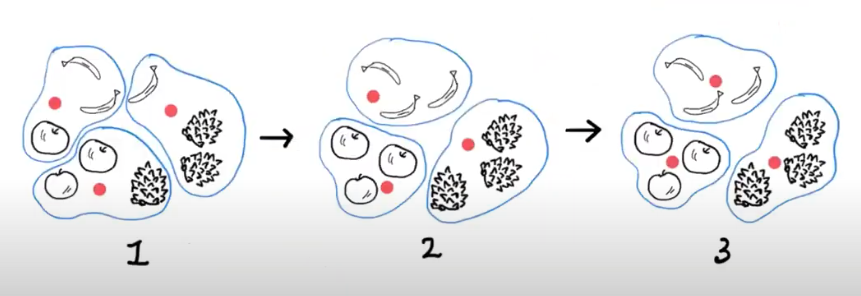

- 먼저 3개의 클러스터 중심(<font color=red>빨간 점</font>)을 랜덤하게 지정한다**(1)**. 그리고 클러스터 중심에서 가장 가까운 샘플을 하나의 클러스터로 묶는다. 왼쪽 위부터 시계 방향으로 바나나 2개와 사과 1개 클러스터, 바나나 1개와 파인애플 2개 클러스터, 사과 2개와 파인애플 1개 클러스터가 만들어졌다. (클러스터에는 순서나 번호는 의미가 없다.)
- 그다음 클러스터의 중심을 다시 계산하여 이동시킨다. 맨 아래 클러스터는 사과쪽으로 중심이 조금 더 이동하고 왼쪽 위의 클러스터는 바나나 쪽으로 중심이 더 이동하는 식이다. 
- 클러스터 중심을 다시 계산한 다음 가장 가까운 샘플을 다시 클러스터로 묶는다**(2)**. 이제 3개의 클러스터에는 바나나와 파인애플, 사과 3개씩 올바르게 묶여 있다. 다시 한번 클러스터 중심을 계산하고, 그다음 <font color=red>빨간 점</font>을 클러스터의 가운데 부분으로 이동시킨다.
- 이동된 클러스터 중심에서 다시 한번 가장 가까운 샘플을 클러스터로 묶는다**(3)**. 중심에서 가장 가까운 샘플은 이전 클러스터**(2)**와 동일하다. 따라서 만들어진 클러스터에 변동이 없으므로 K-평균 알고리즘을 종료한다. 
- K-평균 알고리즘은 처음에는 랜덤하게 클러스터 중심을 선택하고 점차 가장 가까운 샘플의 중심으로 이동하는 비교적 간단한 알고리즘이다. 

## 2. KMeans 클래스 
- 앞에서 사용했던 데이터셋을 여기에도 사용한다. 

In [1]:
# wget 명령으로 데이터 다운로드 
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-10-11 05:58:49--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-10-11 05:58:49--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-10-11 05:58:50--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
# 넘파이 배열 준비 - 3차원 배열을 2차원으로 변경
import numpy as np 
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

- 데이터셋 다운로드 후 넘파이 np.load() 함수를 사용해 npy 파일을 읽어 넘파이 배열을 준비한다 K-평균 모델을 훈련하기 위해(샘플 개수, 너비, 높이) 크기의 3차원 배열을 (샘플 개수, 너비X높이) 크기를 가진 2차원 배열로 변경하였다. 

- 사이킷런의 K-평균 알고리즘은 **sklean.cluster** 모듈 아래 **KMeans** 클래스에 구현되어 있다. 이 클래스에서 설정할 매개변수는 클러스터 개수를 지정하는 **n_clusters**이다. (여기에서는 클러스터 개수를 3으로 지정한다.)
- 해당 클래스를 사용하는 방법도 다른 클래스들과 비슷하다. 다만 비지도 학습이므로 fit() 메서드에서 타깃 데이터를 사용하지 않는다 라는 차이점이 있다.  

In [4]:
# KMeans 클래스 선언 및 훈련 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

- 군집된 결과는 KMeans 클래스 객체의 'labels_' 속성에 저장된다. 'labels_' 배열의 길이는 샘플 개수와 같다. 이 배열은 각 샘플이 어떤 레이블에 해당되는지 나타낸다. n_clusters=3으로 지정했기 때문에 'labels_' 배열의 값은 0, 1, 2 중 하나이다.

In [5]:
# 군집된 결과 출력 
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


- 레이블값 0, 1, 2와 레이블 순서에는 어떤 의미도 없다. 실제 레이블 0, 1, 2가 어떤 과일 사진을 주로 모았는지 알아보려면 직접 이미지를 출력하는 것이 최선이다. 그 전에 레이블 0, 1, 2로 모은 샘플의 개수를 확인해보자.

In [6]:
# 레이블 0, 1, 2로 모은 샘플 개수 확인 
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


- 확인 결과 첫 번째 클러스터(레이블 0)가 91개 샘플을 모았고, 두 번째 클러스터(레이블 1)가 98개의 샘플을, 세 번째 클러스터(레이블 2)는 111개의 샘플을 각각 모았다. 그럼 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하기 위해 간단한 유틸리티 함수 draw_fruits()를 만들어보자.

In [7]:
# 각 클러스터의 이미지 출력을 위해 draw_fruits() 함수 생성 

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)       # n은 샘플 개수
  # 한줄에 10개씩 이미지를 그린다. 샘플의 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
  # 행이 1개면 열의 개수는 샘플 개수이다. 그렇지 않으면 10개이다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그린다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

- 만든 draw_fruits() 함수는 (샘플 개수, 너비, 높이)의 3차원 배열을 입력받아 가로로 10개씩 이미지를 출력한다. 샘플 개수에 따라 행과 열의 개수를 계산하고 figsize를 지정한다. figsize는 ratio 매개변수에 비례하여 커진다. (ratio의 기본값은 1이다.)
- 그다음 2중 for 반복문을 사용하여 먼저 첫 번째 행을 따라 이미지를 그린다. 그리고 두 번째 행의 이미지를 그리는 식으로 계속된다. 
- 이 함수를 사용해 레이블이 0인 과일 사진을 모두 그려보자. 

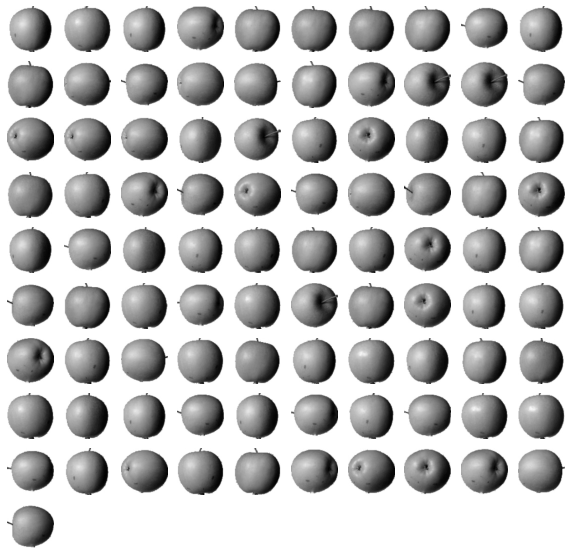

In [8]:
# draw_fruits 함수를 통해 레이블 0 출력 
draw_fruits(fruits[km.labels_==0])

- 'km.labels_==0'과 같이 쓰면 'km.labels_' 배열에서 값이 0인 위치는 'True', 그 외는 모두 'False'가 된다. 넘파이는 이런 불리언 배열을 사용해 원소를 선택할 수 있다. (이를 **불리언 인덱싱(boolean indexing)**라고 한다. 4장 참조) 넘파이 배열에 불리언 인덱싱을 적용하면 'True'인 위치의 원소만 모두 추출한다. (레이블0으로 출력한 결과 91개의 이미지 모두 출력 -> 사과)

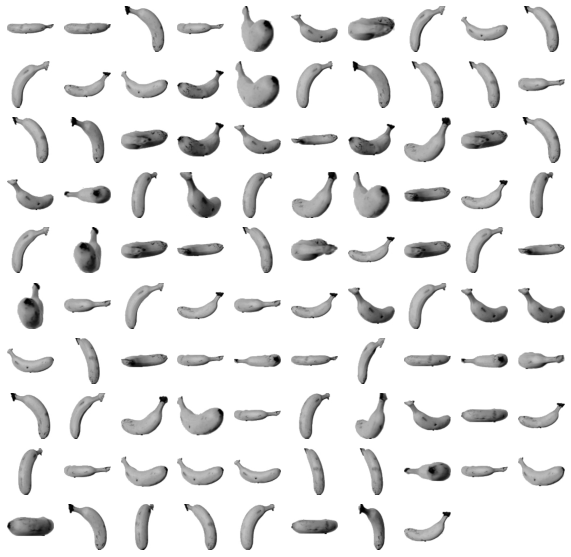

In [9]:
# draw_fruits 함수를 통해 레이블 1 출력 
draw_fruits(fruits[km.labels_==1])

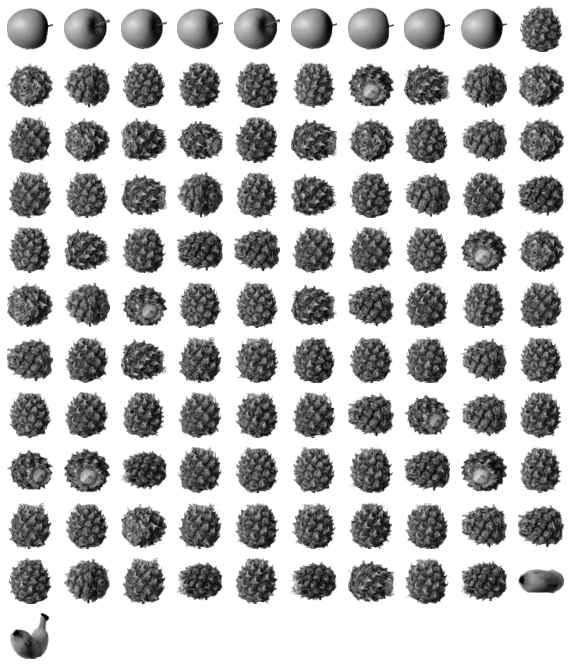

In [10]:
# draw_fruits 함수를 통해 레이블 2 출력 
draw_fruits(fruits[km.labels_==2])

- 모두 출력 결과 레이블 1인 클러스터는 바나나로만 이루어져 있다. 하지만 레이블 2인 클러스터는 파인애플에 사과 9개와 바나나 2개가 섞여있는 결과가 나왔다. K-평균 알고리즘이 이 샘플들을 완벽하게 구별해내지는 못했지만 훈련 데이터에 타깃 레이블을 전혀 제공하지 않았음에도 스스로 비슷한 샘플들을 잘 모은 것 같다. 

## 3. 클러스터 중심 
- KMeans 클래스가 최종적으로 찾은 클러스터 중심은 'cluster_center_' 속성에 저장되어 있다. 이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 이미지로 출력하려면 100 X 100 크기의 2차원 배열로 바꿔야 한다.

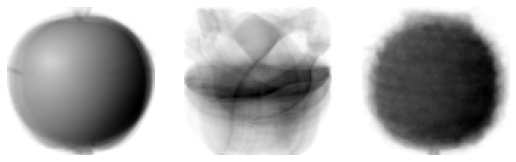

In [11]:
# 샘플 이미지 100 X 100 크기의 2차원 배열로 출력 
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

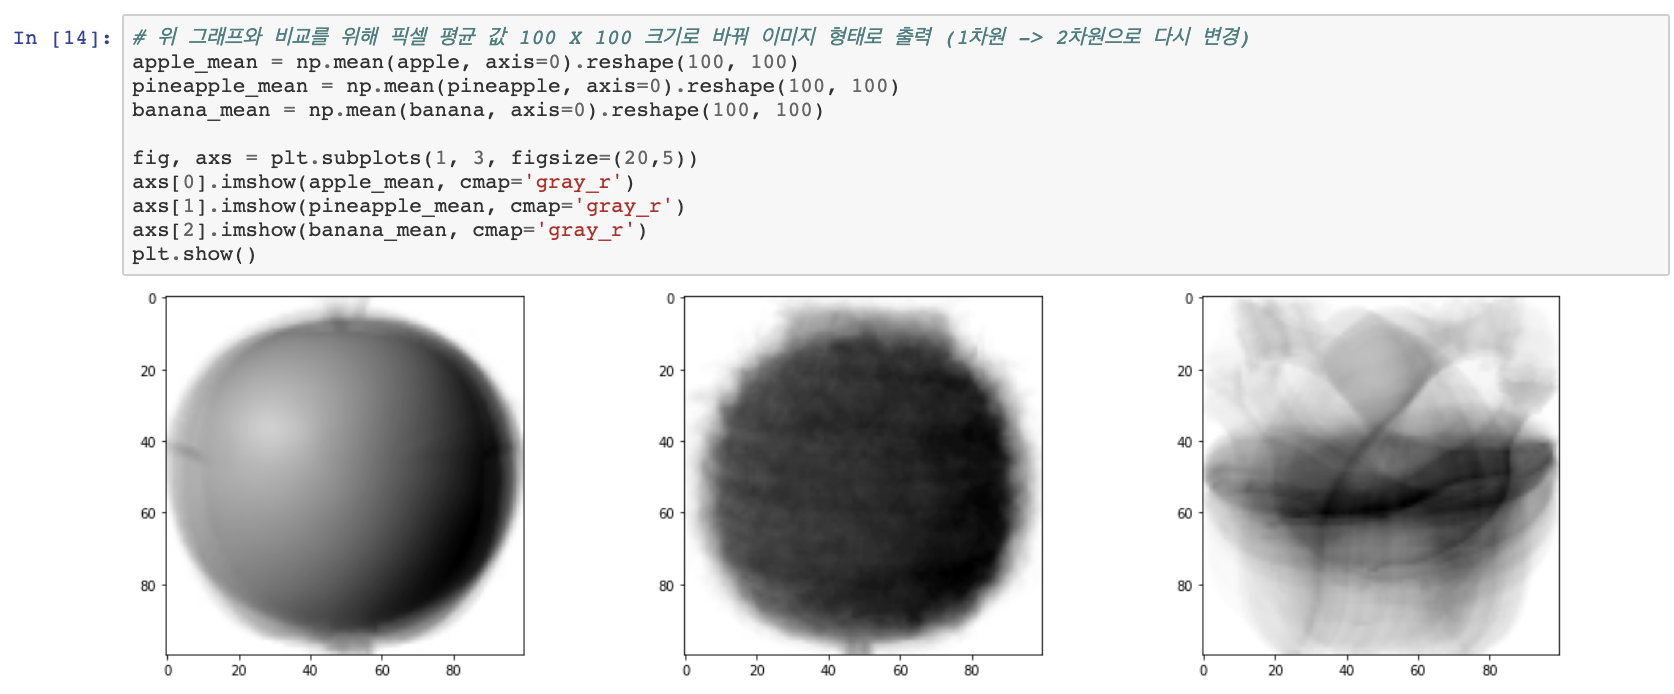

- 앞에(6-1, 14번째 코드) 사과, 바나나, 파인애플의 픽셀 평균값을 출력했던 것과 매우 비슷하게 나왔다. 
- KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 주는 transform() 메서드를 가지고 있다. transform() 메서드가 있다는 것은 마치 StandardScaler 클래스 처럼 특성값을 변환하는 도구로 사용할 수 있다는 의미와 비슷하다. 
- 인덱스가 100인 샘플에 transform() 메서드를 적용해보자. fit() 메서드와 마찬가지로 2차원 배열을 기대한다. fruits_2d[100]처럼 쓰면 (1000,) 크기의 배열이 되므로 에러가 발생한다. 슬라이싱 연산자를 사용해 (1, 1000) 크기의 배열을 전달한다. 

In [12]:
# 인덱스가 100인 샘플로 (1, 1000)크기의 배열 전달
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [14]:
# fruits_2d[100]으로 사용했을 시 에러 
print(km.transform(fruits_2d[100]))

ValueError: ignored

- 하나의 샘플을 전달했기 때문에 반환된 배열은 크기가 (1, 클러스터 개수)인 2차원 배열이다. 첫 번째 클러스터(레이블 0), 두 번째 클러스터(레이블 1)가 각각 첫 번째 원소, 두 번째 원소의 값이다.세 번째 클러스터까지의 거리가 3393.8로 가장 작다. 이 샘플은 레이블 2에 속한 것 같다. KMeans 클래스는 가장 가까운 클러스터 중심을 예측 클래스로 출력하는 predict() 메서드를 제공한다.

In [16]:
# predict() 메서드로 확인해보기 
print(km.predict(fruits_2d[100:101]))

[2]


- transform()의 결과에서 짐작할 수 있듯이 레이블 2로 예측했다. 클러스터 중심을 그려보았을 때 레이블 2는 파인애플이었으므로 이 샘플은 파인애플임을 짐작 할 수있다. 

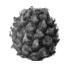

In [17]:
# 예측한 이미지 확인하기 
draw_fruits(fruits[100:101])

- K-평균 알고리즘은 앞에서 설명했듯이 반복적으로 클러스터 중심을 옮기면서 최적을 클러스터를 찾는다. 알고리즘이 반복한 횟수는 KMeans 클래스의 n_iter_ 속성에 저장된다. 

In [18]:
# 알고리즘 반복 횟수 n_iter_속성에 저장됨을 확인 
print(km.n_iter_)

3


- 클러스터 중심을 특성 공학처럼 사용해 데이터셋을 저차원(이 경우에는 10,000에서 3으로 줄인다.)으로 변환할 수 있다. 또는 가장 가까운 거리에 있는 클러스터 중심을 샘플의 예측값으로 사용할 수 있다는 것을 배웠다. 
- 이번에 우리는 타깃값을 사용하지 않았지만, 약간의 편법을 사용하였다. n_clusters를 3으로 지정한 것은 타깃에 대한 정보를 활용한 셈이다. 실전에서는 클러스터 개수 조차 알 수 없다. 그렇다면 n_clusters를 어떻게 지정하며 최적의 클러스터 개수는 얼마일까?

## 4. 최적의 K 찾기 
- K-평균 알고리즘의 단점 중 하나는 클러스터 개수를 사전에 지정해야 한다는 것이다. 실전에서는 몇 개의 클러스터가 있는지 알 수 없다. 어떻게 하면 적절한 K 값을 찾을 수 있을까?
- 사실 군집 알고리즘에서 적절한 K 값을 찾기 위한 완벽한 방법은 없다. 몇 가지 도구가 있지만 저마다 장단점이 있다. 여기서는 클러스터 개수를 찾기 위한 대표적인 방법 **엘보우(elbow)** 방법에 대해 알아보자. 
- 앞에서 본 것처럼 K-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있다. 이 거리의 제곱 합을 **이너셔(inertia)**라고 부른다. 이너셔는 '클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값으로 생각할 수 있다.' 일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이녀서도 줄어든다. 엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법이다.
- 클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있다. 이 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않는다. 즉 이너셔가 크게 줄어들지 않는다. 이 지점이 마치 팔꿈치 모양이어서 엘보우 방법이라 부른다. 

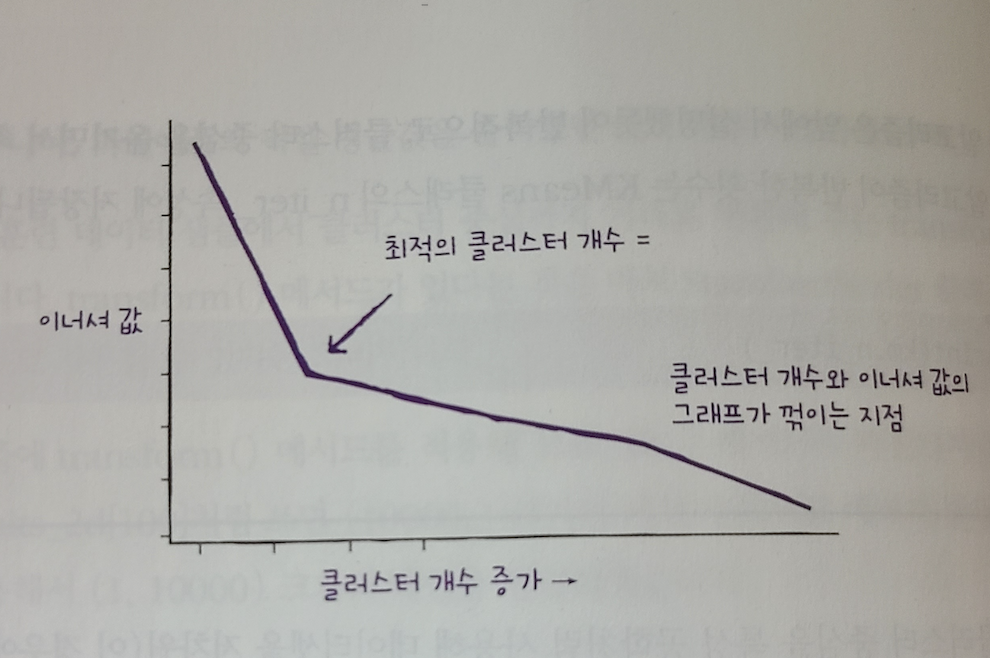

- 과일 데이터셋을 사용해 이너셔를 계산해보자. 친절하게도 KMeans 클래스는 자동으로 이너셔를 계산해서 inertia_ 속성으로 제공한다. 다음 코드에서 클러스터 개수 K를 2에서 6까지 바꿔가며 KMeans 클래스를 5번 훈련한다. fit() 메서드로 모델을 훈련한 후 inertia_ 속성에 저장된 이너셔 값을 inertia 리스트에 추가한다. 마지막으로 inertia 리스트에 저장된 값을 그래프로 출력한다. 

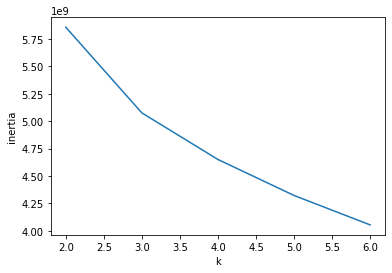

In [19]:
# 과일 데이터 셋을 사용하여 이너셔 계산후 inertia 리스트에 저장된 값을 그래프로 출력 
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

- 이 그래프에서 꺾이는 지점이 뚜렷하지는 않지만, k = 3에서 그래프의 기울기가 조금 바뀐 것을 볼 수 있다. 엘보우 지점보다 클러스터 개수가 많아지면 이너셔의 변화가 줄어들면서 군집 효과도 줄어든다. 하지만 아쉽게도 이 그래프에서는 이런 지점이 명확하게 나타나지 않았다. 

## 문제해결 과정 및 결론
- 문제해결 과정 
  - 6-1에서는 과일을 종류별로 픽셀 평균값을 계산했다. 하지만 실전에서는 어떤 과일 사진이 들어올지 모른다. 따라서 타깃값을 모르는 척 하고 자동으로 사진을 클러스터로 모을 수 있는 군집 알고리즘이 필요하다.
  - 여기에서는 대표적인 군집 알고리즘인 K-평균 알고리즘을 사용했다. K-평균은 비교적 간단하고 속도가 빠르며 이해하기도 쉽다. K-평균 알고리즘을 구현한 사이킷런의 KMeans 클래스는 각 샘플이 어떤 클러스터에 소속되어 있는지 labels_ 속성에 저장한다.
  - 각 샘플에서 각 클러스터까지의 거리를 하나의 특성으로 활용할 수도 있다. 이를 위해 KMeans 클래스는 transform() 메서드를 제공한다. 또한 predict() 메서드에서 새로운 샘플에 대해 가장 가까운 클러스터를 예측값으로 출력한다. 
  - K-평균 알고리즘은 사전에 클러스터 개수를 미리 지정해야 한다. 사실 데이터를 직접 확인하지 않고서는 몇 개의 클러스터가 만들어질지 알기 어렵다. 최적의 클러스터 개수 k를 알아내는 한 가지 방법은 클러스터가 얼마나 밀접되어 있는지 나타내는 이너셔를 사용하는 것이다. 이너셔가 더 이상 크게 줄어들지 않는다면 클러스터 개수를 더 늘리는 것은 효과가 없다.이를 엘보우 방법이라고 부른다. 
  - 사이킷런의 KMeans 클래스는 자동으로 이너셔를 계산하여 inertia_ 속성으로 제공한다. 클러스터 개수를 늘리면서 반복하여 KMeans 알고리즘을 훈련하고 이너셔가 줄어드는 속도가 꺾이는 지점을 최적의 클러스터 개수로 결정한다. 
  - 여기서 K-평균 알고리짐의 클러서트 중심까지 거리를 특성으로 사용할 수도 있다는 점을 보았다. 이렇게 하면 훈련 데이터의 차원을 크게 줄일 수 있다. 데이터셋의 차원을 줄이면 지도 학습 알고리즘의 속도를 크게 높일 수 있다. 다음에는 비지도 학습의 또다른 종류인 차원 축소에 대해 본격적으로 알아본다.